In [1]:
import numpy as np
import pandas as pd
import os
import warnings

In [3]:
grocery_data = pd.read_csv("Datasets/BreadBasket_DMS.csv")

In [4]:
grocery_data.head()

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam


In [5]:
print(grocery_data.shape)

(21293, 4)


### Splitting the data into Months Days and Hours

In [6]:
grocery_data['Month'] = [i.split('-')[1] for i in grocery_data.Date]        #it takes Date from grocery data and splits it by '-' and then returns the value at first index, i.e., Month
grocery_data['Days'] = [i.split('-')[2] for i in grocery_data.Date]         #it takes Date from grocery data and splits it by '-' and then returns the value at second index, i.e., Date
grocery_data['Hours'] = [i.split(':')[0] for i in grocery_data.Time]        #it takes Time from grocery data and splits it by ':' and then returns the value at zeroth index, i.e., Hour

In [7]:
grocery_data.head()

,Date,Time,Transaction,Item,Month,Days,Hours
0,2016-10-30,09:58:11,1,Bread,10,30,09
1,2016-10-30,10:05:34,2,Scandinavian,10,30,10
2,2016-10-30,10:05:34,2,Scandinavian,10,30,10
3,2016-10-30,10:07:57,3,Hot chocolate,10,30,10
4,2016-10-30,10:07:57,3,Jam,10,30,10


### Counting unique Data Items

In [8]:
total_items = list(grocery_data.Item.unique())            #returns the unique Items in grocery_data file
print(total_items)

['Bread', 'Scandinavian', 'Hot chocolate', 'Jam', 'Cookies', 'Muffin', 'Coffee', 'Pastry', 'Medialuna', 'Tea', 'NONE', 'Tartine', 'Basket', 'Mineral water', 'Farm House', 'Fudge', 'Juice', "Ella's Kitchen Pouches", 'Victorian Sponge', 'Frittata', 'Hearty & Seasonal', 'Soup', 'Pick and Mix Bowls', 'Smoothies', 'Cake', 'Mighty Protein', 'Chicken sand', 'Coke', 'My-5 Fruit Shoot', 'Focaccia', 'Sandwich', 'Alfajores', 'Eggs', 'Brownie', 'Dulce de Leche', 'Honey', 'The BART', 'Granola', 'Fairy Doors', 'Empanadas', 'Keeping It Local', 'Art Tray', 'Bowl Nic Pitt', 'Bread Pudding', 'Adjustment', 'Truffles', 'Chimichurri Oil', 'Bacon', 'Spread', 'Kids biscuit', 'Siblings', 'Caramel bites', 'Jammie Dodgers', 'Tiffin', 'Olum & polenta', 'Polenta', 'The Nomad', 'Hack the stack', 'Bakewell', 'Lemon and coconut', 'Toast', 'Scone', 'Crepes', 'Vegan mincepie', 'Bare Popcorn', 'Muesli', 'Crisps', 'Pintxos', 'Gingerbread syrup', 'Panatone', 'Brioche and salami', 'Afternoon with the baker', 'Salad', 'Chi

In [9]:
print(total_items.__len__())            #returns the count of unique items

95


### Counting the Sales of each unique Item

In [10]:
from collections import Counter
total_sale = Counter(grocery_data.Item)              #returns the no of times that item is in the list
print(total_sale)

Counter({'Coffee': 5471, 'Bread': 3325, 'Tea': 1435, 'Cake': 1025, 'Pastry': 856, 'NONE': 786, 'Sandwich': 771, 'Medialuna': 616, 'Hot chocolate': 590, 'Cookies': 540, 'Brownie': 379, 'Farm House': 374, 'Muffin': 370, 'Juice': 369, 'Alfajores': 369, 'Soup': 342, 'Scone': 327, 'Toast': 318, 'Scandinavian': 277, 'Truffles': 193, 'Coke': 185, 'Spanish Brunch': 172, 'Fudge': 159, 'Baguette': 152, 'Jam': 149, 'Tiffin': 146, 'Mineral water': 136, 'Jammie Dodgers': 125, 'Chicken Stew': 123, 'Hearty & Seasonal': 107, 'Salad': 99, 'Frittata': 81, 'Smoothies': 77, 'Keeping It Local': 63, 'The Nomad': 58, 'Focaccia': 54, 'Vegan mincepie': 54, 'Bakewell': 48, 'Tartine': 47, 'Afternoon with the baker': 44, 'Art Tray': 38, 'Extra Salami or Feta': 38, 'Eggs': 28, 'Granola': 28, 'Tshirt': 21, 'My-5 Fruit Shoot': 18, "Ella's Kitchen Pouches": 17, 'Vegan Feast': 16, 'Crisps': 14, 'Dulce de Leche': 13, "Valentine's card": 13, 'Pick and Mix Bowls': 12, 'Kids biscuit': 12, 'Duck egg': 12, 'Mighty Protein':

### Converting it into a dataframe

In [11]:
most_sold = total_sale.most_common(15)                       #we have taken the 15 most common items
x,y = zip(*most_sold)                                        #we zipped the data in x and y
x,y = list(x), list(y)                                       #now we have separated it into two different list
names = pd.DataFrame(x)                                      #here we have converted the list into dataframe
no_of_sales = pd.DataFrame(y)
most_sold_items = pd.concat([names.iloc[:,0], no_of_sales.iloc[:,0]], axis=1)     #now we joined the two dataframes, iloc means locating(rows and columns), here we have taken all the rows and 0 means first column
most_sold_items.columns = 'Items','No. of Sales'
most_sold_items.head()

,Items,No. of Sales
0,Coffee,5471
1,Bread,3325
2,Tea,1435
3,Cake,1025
4,Pastry,856


### Ploting a Pie-Chart out of it

In [12]:
import chart_studio.plotly as py                                    #importing poltly
from plotly.offline import init_notebook_mode, plot, iplot          #using poltly offline
init_notebook_mode(connected = True)                                #init notebook connected so that it can be used in jupyter notebook
import plotly.graph_objs as go
init_notebook_mode(connected = True)
val = most_sold_items.Items                                         #we have stored the names of most sold items in val
fig = {
       'data': [{'values': most_sold_items.iloc[:,1], 'labels':val, 'name': 'Products', 'hoverinfo': 'label+percent',
                 'hole':.4, 'type': 'pie'}],
       'layout':{
           'title': 'Most Sold 15 products', 'annotations': [{'font':{'size':20}, 'showarrow': False, 'text':'Most Sold',
                                                             'x':.5, 'y':.5}]
                }
      }
# in values we pass second column of most_sold_items by iloc and then in labels we pass the Items which we have already stoed in val
# hoverinfo is the info displayed when we hover the mouse on the graph, hole is the center hole and type is the type of graph

iplot(fig)

In [13]:
# another method to plot a pie-chart
labels = x          # x is items
values = y          # y is sales of that item
trace = go.Pie(labels = labels, values = values, hoverinfo = 'label+percent', textinfo = 'value', textfont = dict(size=20),
              marker = dict(line = dict(color = '#000000', width=2) ))
iplot([trace], filename='graph_object_pie_chart')

### Counting Sales of each Item per hour

In [14]:
hour_list = sorted(list(grocery_data.Hours.unique()))      #here we have sorted list of hours in which sales were made
items_per_hour = []
for i in hour_list:
    x = grocery_data[grocery_data.Hours == i]
    items_per_hour.append(Counter(x.Item))           #in items_per_hour we are storing the count of each item sold in that hour
items_per_hour

[Counter({'Bread': 1}),
 Counter({'Coffee': 13,
          'Pastry': 2,
          'Bread': 2,
          'Medialuna': 6,
          'Toast': 1,
          'NONE': 1}),
 Counter({'Coffee': 199,
          'Cake': 8,
          'Tartine': 1,
          'NONE': 24,
          'Bread': 171,
          'Pastry': 57,
          'Jam': 7,
          'Tea': 21,
          'Hot chocolate': 9,
          'Coke': 1,
          'Medialuna': 43,
          'Farm House': 13,
          'Sandwich': 5,
          'Scandinavian': 6,
          'Fudge': 2,
          'Granola': 1,
          'Brownie': 5,
          'Keeping It Local': 3,
          'Siblings': 2,
          'Muffin': 3,
          'Toast': 23,
          'Cookies': 12,
          'Scone': 6,
          'Juice': 4,
          'Vegan mincepie': 1,
          'Alfajores': 4,
          'Dulce de Leche': 1,
          'Muesli': 2,
          'Panatone': 1,
          'Gingerbread syrup': 1,
          'Afternoon with the baker': 3,
          'Nomad bag': 1,
          'Bagu

In [15]:
grocery_hours = pd.DataFrame(items_per_hour).set_index([hour_list])  #we have crested a DF of items_per_hour and hour_list is the index
grocery_hours

,Bread,Coffee,Pastry,Medialuna,Toast,NONE,Cake,Tartine,Jam,Tea,...,Spread,Bare Popcorn,Olum & polenta,Polenta,Raw bars,Hack the stack,Tshirt,Adjustment,Pintxos,Postcard
01,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
07,2.0,13.0,2.0,6.0,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
08,171.0,199.0,57.0,43.0,23.0,24.0,8.0,1.0,7.0,21.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
09,400.0,583.0,191.0,120.0,64.0,79.0,40.0,4.0,22.0,103.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,508.0,820.0,203.0,125.0,61.0,97.0,83.0,3.0,23.0,156.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,528.0,946.0,151.0,108.0,55.0,114.0,133.0,11.0,28.0,176.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,474.0,740.0,97.0,55.0,45.0,167.0,127.0,11.0,15.0,183.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,340.0,607.0,48.0,36.0,23.0,159.0,124.0,9.0,12.0,181.0,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,341.0,636.0,49.0,48.0,22.0,96.0,182.0,2.0,22.0,233.0,...,1.0,2.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN
15,310.0,519.0,32.0,34.0,16.0,32.0,174.0,4.0,9.0,207.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Creating Dataframes of Sales, Sum and Percent of Sales per hour

In [16]:
sales_list = []
sales_list_sum = []
sales_list_percent = []

for i in hour_list:
    sales_list.append(grocery_hours.loc[i, :].sum())
    counters_val = grocery_data[grocery_data.Hours == i]
    sales_list_sum.append(counters_val.Item.value_counts())
    sales_list_percent.append(((counters_val.Item.value_counts())/len(counters_val.Hours)*100))

sales_list = (pd.DataFrame(sales_list)).set_index([hour_list])
sales_list['Hours'] = sales_list.index
sales_list.columns = "Number_of_Sales", "Hours"
sales_list_sum  = (pd.DataFrame(sales_list_sum)).set_index([hour_list])
sales_list_percent = (pd.DataFrame(sales_list_percent)).set_index([hour_list])

In [17]:
print(sales_list)                         #returns the total number of sales per hour

    Number_of_Sales Hours
01              1.0    01
07             25.0    07
08            669.0    08
09           2045.0    09
10           2763.0    10
11           3216.0    11
12           3021.0    12
13           2776.0    13
14           2736.0    14
15           2147.0    15
16           1356.0    16
17            372.0    17
18             82.0    18
19             48.0    19
20             22.0    20
21              3.0    21
22              8.0    22
23              3.0    23


In [18]:
print(sales_list_sum)                     #reutrns the sum of item sold in an hour

    Bread  Coffee  Medialuna  Pastry   NONE  Toast    Tea  Farm House  \
01    1.0     NaN        NaN     NaN    NaN    NaN    NaN         NaN   
07    2.0    13.0        6.0     2.0    1.0    1.0    NaN         NaN   
08  171.0   199.0       43.0    57.0   24.0   23.0   21.0        13.0   
09  400.0   583.0      120.0   191.0   79.0   64.0  103.0        64.0   
10  508.0   820.0      125.0   203.0   97.0   61.0  156.0        55.0   
11  528.0   946.0      108.0   151.0  114.0   55.0  176.0        78.0   
12  474.0   740.0       55.0    97.0  167.0   45.0  183.0        58.0   
13  340.0   607.0       36.0    48.0  159.0   23.0  181.0        37.0   
14  341.0   636.0       48.0    49.0   96.0   22.0  233.0        21.0   
15  310.0   519.0       34.0    32.0   32.0   16.0  207.0        25.0   
16  196.0   321.0       25.0    16.0   13.0    8.0  126.0        14.0   
17   46.0    69.0       11.0     8.0    4.0    NaN   41.0         6.0   
18    6.0    11.0        4.0     2.0    NaN    NaN 

In [19]:
print(sales_list_percent)                  #returns the average sales share of that item in that hour
#for example @1o'clock sales share of bread is 100% as none of the other item is sold 

         Bread     Coffee  Medialuna    Pastry      NONE     Toast        Tea  \
01  100.000000        NaN        NaN       NaN       NaN       NaN        NaN   
07    8.000000  52.000000  24.000000  8.000000  4.000000  4.000000        NaN   
08   25.560538  29.745889   6.427504  8.520179  3.587444  3.437967   3.139013   
09   19.559902  28.508557   5.867971  9.339853  3.863081  3.129584   5.036675   
10   18.385813  29.677886   4.524068  7.347087  3.510677  2.207745   5.646037   
11   16.417910  29.415423   3.358209  4.695274  3.544776  1.710199   5.472637   
12   15.690169  24.495200   1.820589  3.210857  5.527971  1.489573   6.057597   
13   12.247839  21.865994   1.296830  1.729107  5.727666  0.828530   6.520173   
14   12.463450  23.245614   1.754386  1.790936  3.508772  0.804094   8.516082   
15   14.438752  24.173265   1.583605  1.490452  1.490452  0.745226   9.641360   
16   14.454277  23.672566   1.843658  1.179941  0.958702  0.589971   9.292035   
17   12.365591  18.548387   

### Plotting a Bar Graph using Matplotlib and Seaborn

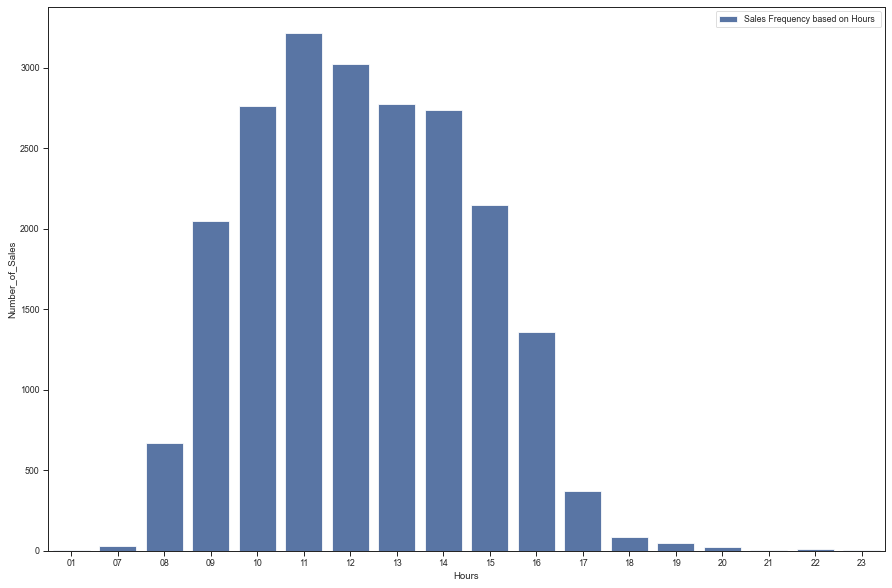

In [21]:
import matplotlib.pyplot as plt 
import seaborn as sns 
f, ax = plt.subplots(figsize=(15, 10))         #here we have specified the size of the figure
sns.barplot(x='Hours', y='Number_of_Sales', data=sales_list, label = 'Sales Frequency based on Hours ', color='b')
# x and y is name of axes and data is our sales data
sns.set(style = "ticks")                      #here we have specified the style of background
sns.set_context('paper')                      #here we have specified the type of background
ax.legend(ncol=2, loc="upper right", frameon=True)       #features of the label

### Plotting a Line Graph using Graph_Object Scatter

In [22]:
trace = go.Scatter( x = sales_list.Hours, y = sales_list.Number_of_Sales, mode = 'lines + markers', name = 'Sales Trend',
                  marker = dict(color = 'rgba(16, 190, 24, 0.8)'))
#on x-axis we have hours and on y-axis we have no of sales from the sales list, mode type is lines and markers
data = [trace]
layout = dict(title = 'Sales trend based upon hours', xaxis = dict(title = 'Hours', ticklen = 5), yaxis = dict(title = 'No of Sales', ticklen = 5))
fig = dict(data = data, layout = layout)
iplot(fig)

### Using Polynomial Regression to predict the Sales per hour

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
x = sales_list.Hours.values.reshape(-1,1)
y = sales_list.Number_of_Sales.values.reshape(-1,1)
pr = PolynomialFeatures(degree = 8)                    #we took polynomial regression with degree = 8
x_pr = pr.fit_transform(x)                             #then we convert the x data, i.e hours in polynomial

linear_reg = LinearRegression()
linear_reg.fit(x_pr, y)                                #then we apply linear regression to our polynipolynomial fitted data

y_pred = linear_reg.predict(x_pr)                      #then we predict y using linear regression
y_pred = pd.DataFrame(y_pred)                          #then we convert the prediction into a DataFrame, so that we can plot it

In [24]:
trace1 = go.Scatter( x = sales_list.Hours, y = sales_list.Number_of_Sales, mode = 'lines + markers', name = 'Actual Value',
                  marker = dict(color = 'rgba(255, 0, 0, 0.8)'))
#on x-axis we have hours and on y-axis we have no of sales from the sales list, mode type is lines and markers
trace2 = go.Scatter( x = sales_list.Hours, y = y_pred.iloc[:,0], mode = 'lines + markers', name = 'Polynomial Regression Predicted Value',
                  marker = dict(color = 'rgba(0, 0, 255, 0.8)'))
#on x-axis we have hours and on y-axis we have the predicted values from polynomial regression, mode type is lines and markers

data = [trace1, trace2]
layout = dict(title = 'Polynomial Regression Prediction of Sales', xaxis = dict(title = 'Hours', ticklen = 10), yaxis = dict(title = 'No of Sales', ticklen = 10))
fig = dict(data = data, layout = layout)
iplot(fig)

## Word Cloud

In [25]:
annual_data = grocery_data.loc[(grocery_data['Date'] >= '2016-10-30') & (grocery_data['Date'] < '2017-01-01' )]

In [26]:
annual_data      #here we are taking the data of year 2016 only 

,Date,Time,Transaction,Item,Month,Days,Hours
0,2016-10-30,09:58:11,1,Bread,10,30,09
1,2016-10-30,10:05:34,2,Scandinavian,10,30,10
2,2016-10-30,10:05:34,2,Scandinavian,10,30,10
3,2016-10-30,10:07:57,3,Hot chocolate,10,30,10
4,2016-10-30,10:07:57,3,Jam,10,30,10
...,...,...,...,...,...,...,...
8556,2016-12-31,15:53:59,4087,Bread,12,31,15
8557,2016-12-31,15:54:56,4088,Tea,12,31,15
8558,2016-12-31,15:54:56,4088,Coke,12,31,15
8559,2016-12-31,17:36:21,4089,Cake,12,31,17


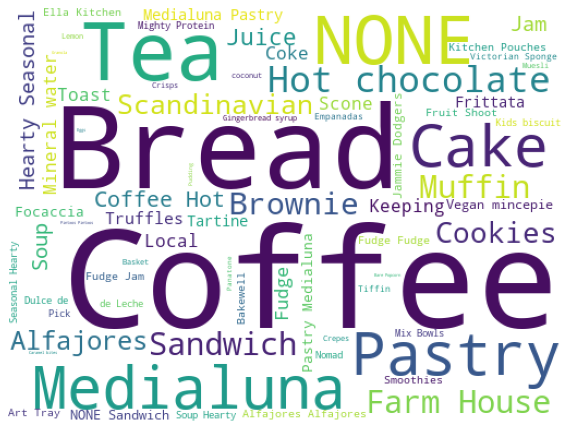

In [27]:
from wordcloud import WordCloud
items = annual_data.Item                  #we are taking only the items from the dataset
plt.subplots(figsize=(10,10))             #defining the figure size
wordcloud = WordCloud(background_color= 'white', width= 512, height=384).generate(' '.join(items))
# here we have specified the background color, width and height of the graph and we are joning all the items a single wordcloud
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
#the most important item in the dataset has the largest size

## Box Plot

In [28]:
annual_data_2016 = grocery_data.loc[(grocery_data['Date'] >= '2016-10-30') & (grocery_data['Date'] < '2017-01-01' )]
annual_data_2017 = grocery_data.loc[(grocery_data['Date'] >= '2017-01-01') & (grocery_data['Date'] < '2017-04-09' )]
trace1 = go.Box(y = annual_data_2016.Transaction, name = '2016 Transactions', marker = dict(color = 'rgb(12,12,140)'))
trace2 = go.Box(y = annual_data_2017.Transaction, name = '2017 Transactions', marker = dict(color = 'rgb(12,128,190)'))
data_project = [trace1,trace2]
iplot(data_project)                           #this can be used for comparison between two years or months data